## **H1N1 AND SEASONAL PREDICTIVE MODELLING**

### **BUSINESS UNDERSTANDING**

The business problem centers on leveraging data from the 2009 H1N1 Flu Survey conducted during and after the H1N1 flu pandemic. There was a lower uptake of the H1N1 vaccine which presents a key area of interest. By analyzing the survey responses on vaccination status against demographic and socio-economic factors, the goal is to gain actionable insights into the drivers and barriers influencing vaccine adoption during a pandemic. This understanding is crucial for informing public health strategies aimed at improving vaccination rates for future pandemics.


### **DATA UNDERSTANDING**

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay,roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

In [2]:
# load the features dataframe
df_x = pd.read_csv('data/training_set_features.csv', index_col=0)
df_x.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [3]:
# load the targets dataframe
df_y = pd.read_csv('data/training_set_labels.csv', index_col=0)
df_y.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [4]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker        

In [5]:
categorical_columns = categorical_columns = df_x.select_dtypes(exclude=['number']).columns
categorical_columns

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation'],
      dtype='object')

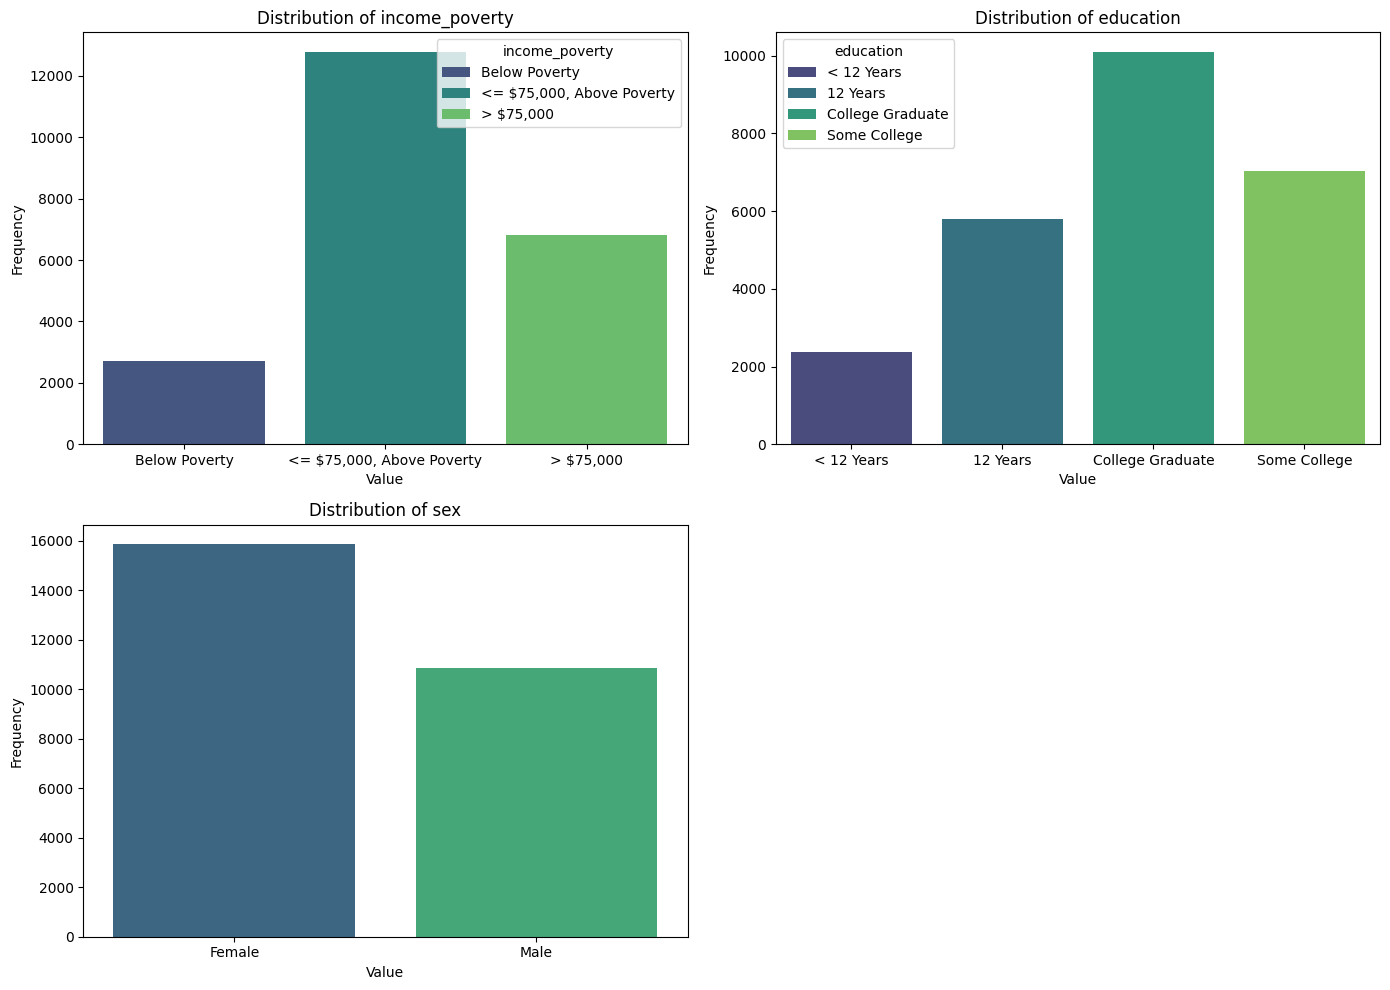

In [6]:
columns = ['income_poverty', 'education', 'sex']

plt.figure(figsize=(14, 10))  

for i, column in enumerate(columns):
    plt.subplot(2, 2, i +1) 
    sns.countplot(data=df_x, x=column, hue=column, palette='viridis')

    plt.title(f'Distribution of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

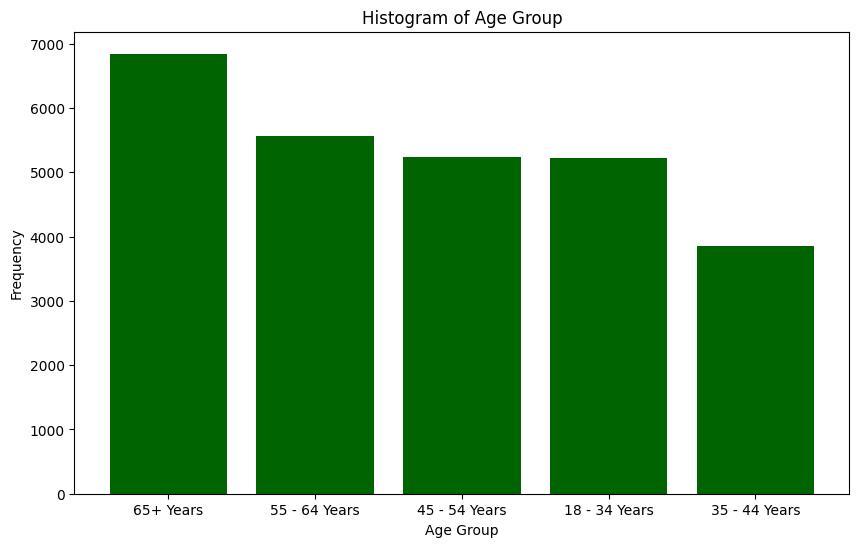

In [7]:
# distribution of age groups
age_group = df_x['age_group'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(age_group.index, age_group.values, color='darkgreen')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Histogram of Age Group')

plt.show()

* Majority of respondents are college students, people who live above poverty level, people who identify with the female gender or people who are 65+ years of age

### **DATA PREPARATION AND PREPROCESSING**

* We will begin by splitting our data to avoid data leakage

In [8]:
# check for missing values in target dataset
df_y.isnull().any()

h1n1_vaccine        False
seasonal_vaccine    False
dtype: bool

In [9]:
# defining X and y
X = df_x
y = df_y[['h1n1_vaccine', 'seasonal_vaccine']]

# splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) 

In [10]:
missing_values = X_train.isnull().sum()

missing_values.sort_values(ascending=False)

employment_occupation          9344
employment_industry            9250
health_insurance               8624
income_poverty                 3090
doctor_recc_seasonal           1473
doctor_recc_h1n1               1473
rent_or_own                    1406
employment_status              1020
education                       983
marital_status                  973
chronic_med_condition           664
child_under_6_months            583
health_worker                   567
opinion_seas_sick_from_vacc     374
opinion_seas_risk               366
opinion_seas_vacc_effective     323
opinion_h1n1_vacc_effective     285
opinion_h1n1_sick_from_vacc     280
opinion_h1n1_risk               274
household_adults                178
household_children              178
behavioral_avoidance            147
behavioral_touch_face            85
h1n1_knowledge                   81
h1n1_concern                     65
behavioral_large_gatherings      56
behavioral_outside_home          55
behavioral_antiviral_meds   

In [11]:
# drop columns 
drop_columns = ['rent_or_own', 'race', 'marital_status', 'employment_occupation', 'employment_industry']
X_train = X_train.drop(drop_columns, axis=1)
X_test = X_test.drop(drop_columns, axis=1)

In [12]:
numerical_columns = df_x.select_dtypes(include=np.number).columns
numerical_columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object')

In [13]:
# fill numerical missing data with their modes using simpleimputer
fill_numerical = ['health_insurance', 'doctor_recc_h1n1', 'doctor_recc_seasonal']

impute_number = SimpleImputer(strategy='most_frequent')

X_train[fill_numerical] = impute_number.fit_transform(X_train[fill_numerical])
X_test[fill_numerical] = impute_number.transform(X_test[fill_numerical])


In [14]:
categorical_columns = df_x.select_dtypes(exclude=['number']).columns
categorical_columns

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation'],
      dtype='object')

In [15]:
# fill categorical missing data with 
fill_categorical =  ['employment_status']

imputer_object = SimpleImputer(strategy='constant',missing_values=np.nan,fill_value='missing')

X_train[fill_categorical] = imputer_object.fit_transform(X_train[fill_categorical])
X_test[fill_categorical] = imputer_object.transform(X_test[fill_categorical])

In [16]:
# drop rows with missing values
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)

In [17]:
# drop same indexes that have been dropped in X_train and X_test
set1 = set(y_test.index)
set2 = set(X_test.index)
set3 = set(y_train.index)
set4 = set(X_train.index)

index_to_drop_test = list(set1 - set2)
index_to_drop_train = list(set3 - set4)

y_test = y_test.drop(index_to_drop_test)
y_train = y_train.drop(index_to_drop_train)

In [18]:
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)

Shape of X_train: (15018, 30)
Shape of y_train: (15018, 2)


Encoding Categorical Features

In [19]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # Added handle_unknown for robustness
columns = ['age_group', 'education', 'sex', 'income_poverty', 'hhs_geo_region', 'census_msa', 'employment_status']
ohe_train = ohe.fit_transform(X_train[columns])
ohe_test = ohe.transform(X_test[columns])

feature_names = ohe.get_feature_names_out(input_features=columns)

X_train_encoded = pd.DataFrame(ohe_train, index=X_train.index, columns=feature_names)
X_test_encoded = pd.DataFrame(ohe_test, index=X_test.index, columns=feature_names)

X_train = pd.concat([X_train.drop(columns=columns), X_train_encoded], axis=1)
X_test = pd.concat([X_test.drop(columns=columns), X_test_encoded], axis=1)


Scaling numerical features to ensure they are all in the same range

In [20]:
# scaling numerical columns
scaling_columns_train = X_train.select_dtypes(include=['number']).columns
scaling_columns_test = X_test.select_dtypes(include=['number']).columns

scaler = StandardScaler()

X_train[scaling_columns_train] = scaler.fit_transform(X_train[scaling_columns_train])
X_test[scaling_columns_test] = scaler.transform(X_test[scaling_columns_test])

### MODELLING

#### **LOGISTIC REGRESSION**

This section look at the iterative modelling process in a bid to arrive at one with the highest accuracy on the test data

**Baseline Model**

In [21]:
# instantiate the base logistic regression
lr = LogisticRegression(solver='saga', random_state=42)

# instantiate the MultiOutputClassifier
baseline_model = MultiOutputClassifier(lr)

# fitting the multilabel model
baseline_model.fit(X_train, y_train)

# predict for the test set
y_pred_test = baseline_model.predict(X_test)

y_test_np = y_test.values
y_pred_test_np = y_pred_test


for i in range(y_test_np.shape[1]):
    print(f'Classification Report for Output {i}:')
    print(classification_report(y_test_np[:, i], y_pred_test_np[:, i], zero_division=0))
    print('\n.......\n')

Classification Report for Output 0:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5040
           1       0.70      0.44      0.54      1390

    accuracy                           0.84      6430
   macro avg       0.78      0.70      0.72      6430
weighted avg       0.83      0.84      0.82      6430


.......

Classification Report for Output 1:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      3441
           1       0.77      0.75      0.76      2989

    accuracy                           0.78      6430
   macro avg       0.78      0.78      0.78      6430
weighted avg       0.78      0.78      0.78      6430


.......



* The model is comfortable predicting individuals who did not get h1n1 vaccine but is struggling with predicting individuals who got it.
* The seasonal vaccine metrics are well balanced but accuracy could be improved

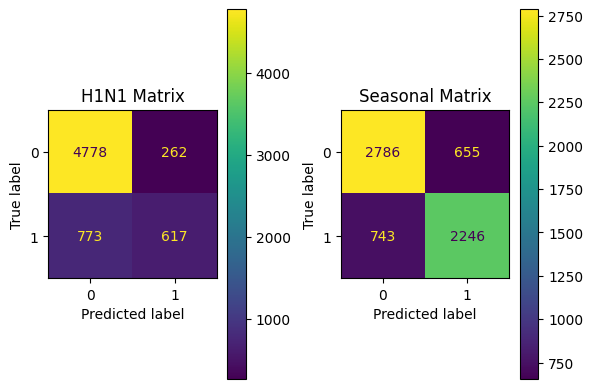

In [22]:
# confusion matrix for H1N1 vaccine
cm_h1n1 = confusion_matrix(y_test['h1n1_vaccine'], y_pred_test[:, 0])

# confusion matrix  for Seasonal vaccine
cm_seasonal = confusion_matrix(y_test['seasonal_vaccine'], y_pred_test[:, 1])
fig, axes = plt.subplots(1, 2, figsize=(6, 4))

# Plot h1n1 and seasonal vaccine confusion matrix
display_1 = ConfusionMatrixDisplay(confusion_matrix=cm_h1n1)
display_2 = ConfusionMatrixDisplay(confusion_matrix=cm_seasonal)

display_1.plot(ax=axes[0])
axes[0].set_title('H1N1 Matrix')

display_2.plot(ax=axes[1])
axes[1].set_title('Seasonal Matrix')

plt.tight_layout()
plt.show()


In [23]:
# function for plotting the ROC curve
def plot_roc_curve(model, X_test, y_test):
    n_classes = y_test.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    y_prob_test = model.predict_proba(X_test)

    plt.figure(figsize=(6, 4))
    for i in range(n_classes):  
        y_test_label = y_test.iloc[:, i].values
        y_score_label = y_prob_test[i][:, 1]

        fpr[i], tpr[i], _ = roc_curve(y_test_label, y_score_label)
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (label {i}, area = {roc_auc[i]:.2f})')


    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    print('AUC: {}'.format(roc_auc))
    plt.show()



AUC: {0: np.float64(0.8403333047847438), 1: np.float64(0.8572045966470684)}


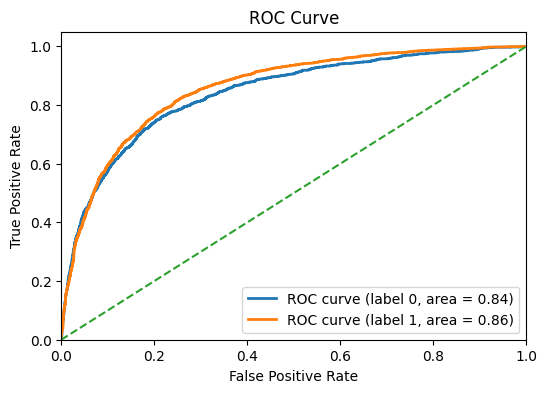

In [24]:
plot_roc_curve(baseline_model, X_test, y_test)

Hyperparameter Tuning

In [25]:
# change parameter to handle class imbalance
alternative =  LogisticRegression( solver= 'lbfgs', class_weight= 'balanced', C=1, max_iter=500, random_state=42)
alternative_model = MultiOutputClassifier(alternative)

alternative_model.fit(X_train, y_train)

y_pred_alt = alternative_model.predict(X_test)

y_test_np = y_test.values
y_pred_alt_np = y_pred_alt


for i in range(y_test_np.shape[1]):
    print(f'Classification Report for Output {i}:')
    print(classification_report(y_test_np[:, i], y_pred_alt_np[:, i], zero_division=0))
    print('\n.......\n')

Classification Report for Output 0:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      5040
           1       0.50      0.75      0.60      1390

    accuracy                           0.78      6430
   macro avg       0.71      0.77      0.73      6430
weighted avg       0.83      0.78      0.80      6430


.......

Classification Report for Output 1:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      3441
           1       0.76      0.78      0.77      2989

    accuracy                           0.78      6430
   macro avg       0.78      0.78      0.78      6430
weighted avg       0.78      0.78      0.78      6430


.......



* The H1N1 class 1 f1 score has increased but the precision has decreased meaning improved performance on individuals taking the vaccine but the prediction probability of it being correct has decreased.
* The seasonal model has minor changes but remains consistent

AUC: {0: np.float64(0.8411525065661756), 1: np.float64(0.8572286118557932)}


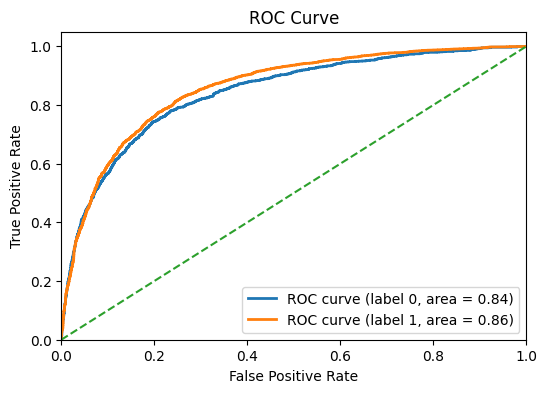

In [26]:

plot_roc_curve(alternative_model, X_test, y_test)

* The H1N1 AUC  has slightly increased suggesting a slight improvement in the new model and the seasonal AUC is still the same

Use GridSearchCV to look for the best parameters

In [27]:
# find the optimal parameters 
final_logistic = LogisticRegression()

param_grid = {
    'C': [0.1, 1.0, 10.0, 100.0],
    'max_iter': [500, 1000, 2000, 3000]
}

# find the best parameters for seasonal vaccine
# instantiate the GridSearchCV
grid_search_seasonal = GridSearchCV(final_logistic, param_grid, cv=5)
grid_search_seasonal.fit(X_train, y_train['seasonal_vaccine'])

optimal_params_seasonal = grid_search_seasonal.best_params_
optimal_params_seasonal

{'C': 0.1, 'max_iter': 500}

In [28]:
# find the best parameters for modelling an improved H1N1 model
grid_search_h1n1 = GridSearchCV(final_logistic, param_grid, cv=5)
grid_search_h1n1.fit(X_train, y_train['h1n1_vaccine'])

optimal_params_h1n1 = grid_search_h1n1.best_params_
optimal_params_h1n1

{'C': 1.0, 'max_iter': 500}

In [29]:
# model h1n1 best parameters
best_model_h1n1 = grid_search_h1n1.best_estimator_

y_pred_h1n1 = best_model_h1n1.predict(X_test)

print(classification_report(y_test['h1n1_vaccine'], y_pred_h1n1, zero_division=0))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5040
           1       0.70      0.44      0.54      1390

    accuracy                           0.84      6430
   macro avg       0.78      0.70      0.72      6430
weighted avg       0.83      0.84      0.83      6430



In [30]:
# handle class imbalance by adjusting class weight
improved_model_h1n1 = LogisticRegression(C=1, class_weight={0:1, 1:2}, max_iter=500, random_state=42)
improved_model_h1n1.fit(X_train, y_train['h1n1_vaccine'])

y_pred_h1n1_im = improved_model_h1n1.predict(X_test)

print(classification_report(y_test['h1n1_vaccine'], y_pred_h1n1_im, zero_division=0))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      5040
           1       0.59      0.61      0.60      1390

    accuracy                           0.82      6430
   macro avg       0.74      0.75      0.74      6430
weighted avg       0.83      0.82      0.82      6430



* The precision of class 1 has improved indicating reduced instances of incorrectly identifying an individual getting the h1n1 vaccine
* The overall accuracy has improved.

In [31]:
# model sesonal best parameters
best_model_seasonal = grid_search_seasonal.best_estimator_

y_pred_seasonal = best_model_seasonal.predict(X_test)

print(classification_report(y_test['seasonal_vaccine'], y_pred_seasonal, zero_division=0))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      3441
           1       0.77      0.75      0.76      2989

    accuracy                           0.78      6430
   macro avg       0.78      0.78      0.78      6430
weighted avg       0.78      0.78      0.78      6430



* The seasonal model has remained stable and balanced.


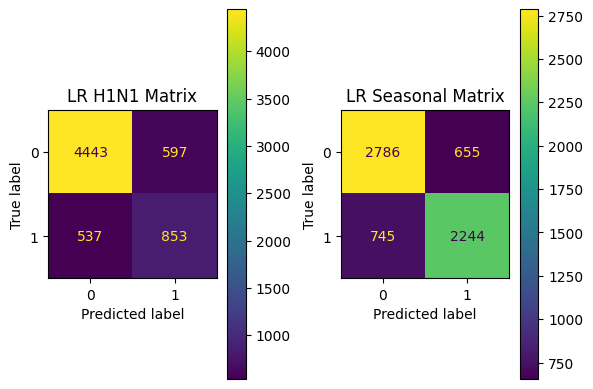

In [32]:
# confusion matrix for optimal h1n1 model
cm_optimal_h1n1 = confusion_matrix(y_test['h1n1_vaccine'], y_pred_h1n1_im)

# confusion matrix  for optimal Seasonal vaccine model
cm_optimal_seasonal = confusion_matrix(y_test['seasonal_vaccine'], y_pred_seasonal)
fig, axes = plt.subplots(1, 2, figsize=(6, 4))

# Plot h1n1 and seasonal vaccine confusion matrix
display_1 = ConfusionMatrixDisplay(confusion_matrix=cm_optimal_h1n1)
display_2 = ConfusionMatrixDisplay(confusion_matrix=cm_optimal_seasonal)

display_1.plot(ax=axes[0])
axes[0].set_title('LR H1N1 Matrix')

display_2.plot(ax=axes[1])
axes[1].set_title('LR Seasonal Matrix')

plt.tight_layout()
plt.show()


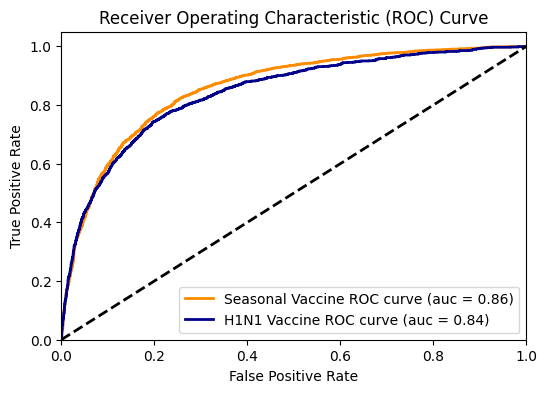

In [33]:
# plot roc curve
y_pred_proba_h1n1_im = improved_model_h1n1.predict_proba(X_test)[:, 1]
y_pred_proba_seasonal = best_model_seasonal.predict_proba(X_test)[:, 1]

fpr_seasonal, tpr_seasonal, thresholds_seasonal = roc_curve(y_test['seasonal_vaccine'], y_pred_proba_seasonal)
roc_auc_seasonal = auc(fpr_seasonal, tpr_seasonal)

fpr_h1n1, tpr_h1n1, thresholds_h1n1 = roc_curve(y_test['h1n1_vaccine'], y_pred_proba_h1n1_im)
roc_auc_h1n1 = auc(fpr_h1n1, tpr_h1n1)

plt.figure(figsize=(6, 4))
plt.plot(fpr_seasonal, tpr_seasonal, color='darkorange', lw=2, label=f'Seasonal Vaccine ROC curve (auc = {roc_auc_seasonal:.2f})')
plt.plot(fpr_h1n1, tpr_h1n1, color='darkblue', lw=2, label=f'H1N1 Vaccine ROC curve (auc = {roc_auc_h1n1:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


* Both models are capable of classifying individuals who took the vaccine but the seasonal model is slightly better

In [34]:
# creating a dataframe of feature importances in logistic regression
feature_names = X_train.columns.tolist()
importances_h1n1_lr = improved_model_h1n1.coef_[0]

h1n1_df_lr = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_h1n1_lr
})
h1n1_df_lr = h1n1_df_lr.sort_values(by='Importance', ascending=False).reset_index(drop=True)
h1n1_df_lr.head()

,Feature,Importance
0,doctor_recc_h1n1,0.838159
1,opinion_h1n1_vacc_effective,0.653355
2,opinion_h1n1_risk,0.504994
3,health_worker,0.276015
4,opinion_seas_risk,0.200704


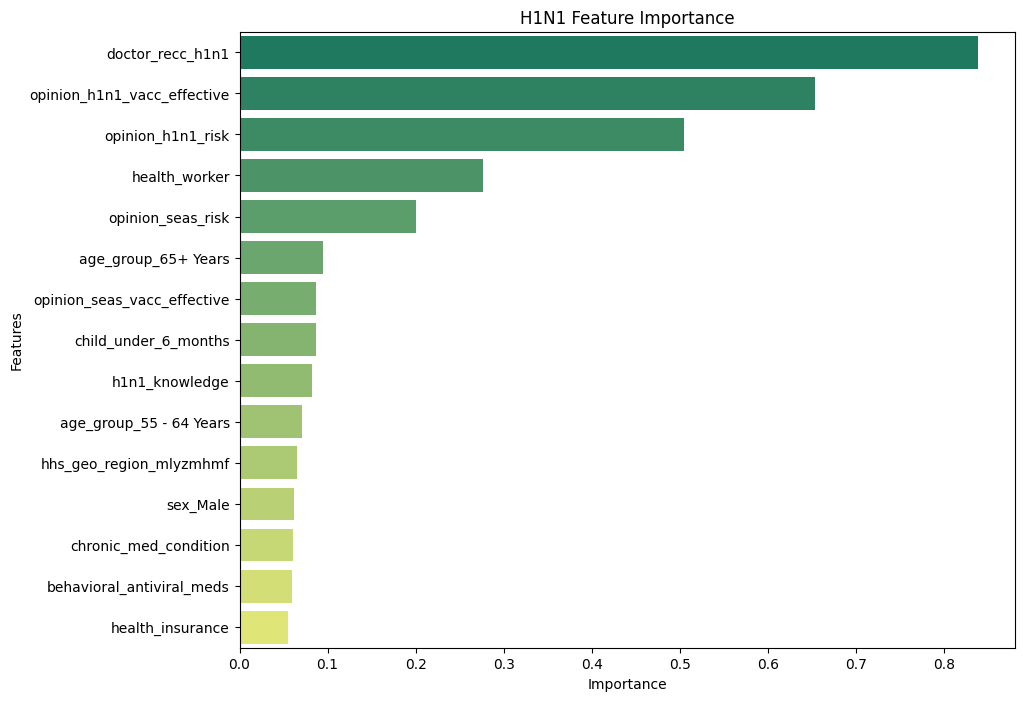

In [35]:
fig,ax = plt.subplots(figsize = (10, 8))

sns.barplot(x=h1n1_df_lr['Importance'][:15], y= h1n1_df_lr['Feature'][:15], hue=h1n1_df_lr['Feature'][:15], palette='summer', ax=ax)
ax.set_ylabel("Features")
ax.set_title('H1N1 Feature Importance');


In [36]:
# create dataframe of seasonal flu feature importance
feature_names = X_train.columns.tolist()
importances_seasonal_lr = best_model_seasonal.coef_[0]

seasonal_df_lr = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_seasonal_lr
})
seasonal_df_lr = seasonal_df_lr.sort_values(by='Importance', ascending=False).reset_index(drop=True)
seasonal_df_lr.head(10)

,Feature,Importance
0,opinion_seas_risk,0.752957
1,doctor_recc_seasonal,0.635167
2,opinion_seas_vacc_effective,0.604876
3,age_group_65+ Years,0.383996
4,health_worker,0.268153
5,h1n1_knowledge,0.116350
6,health_insurance,0.115439
7,behavioral_touch_face,0.099109
8,chronic_med_condition,0.088888
9,"income_poverty_> $75,000",0.070639


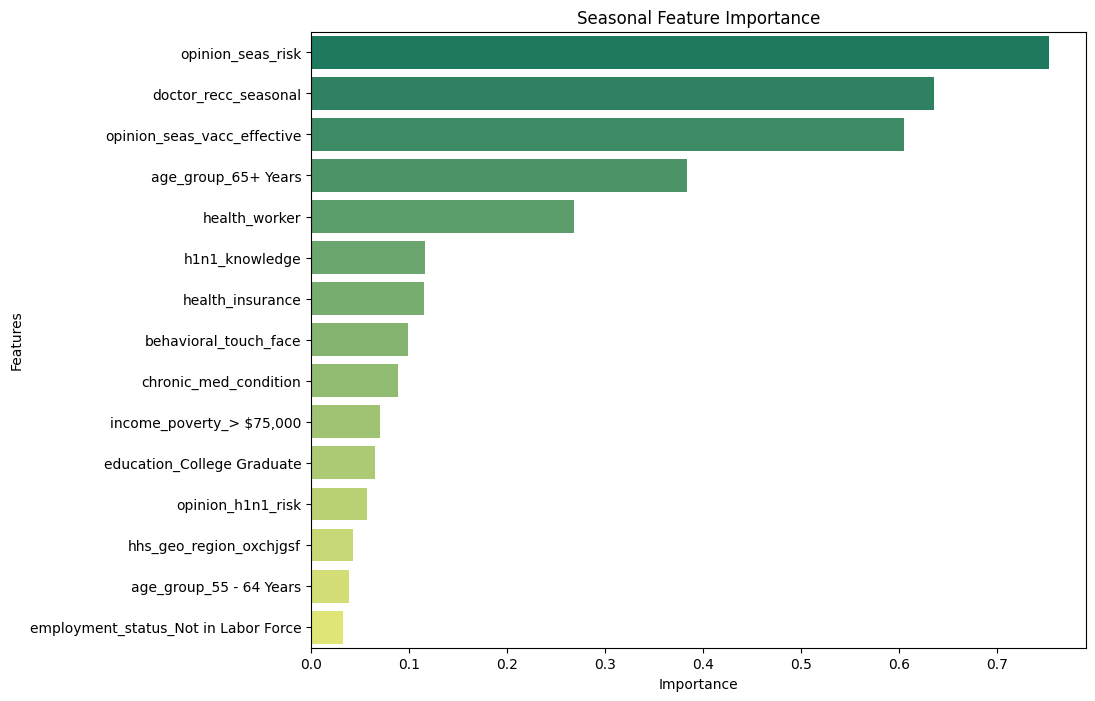

In [37]:
# plot feature importance for seasonal vaccine prediction
fig,ax = plt.subplots(figsize = (10, 8))

sns.barplot(x=seasonal_df_lr['Importance'][:15], y= seasonal_df_lr['Feature'][:15], hue=seasonal_df_lr['Feature'][:15], palette='summer', ax=ax)
ax.set_ylabel('Features')
ax.set_title('Seasonal Feature Importance');


### DECISION TREE CLASSIFIER

Baseline decision tree classifier model

In [38]:
lp_model = DecisionTreeClassifier(criterion='gini', random_state=42)

lp_model.fit(X_train, y_train)
y_pred_lp = lp_model.predict(X_test)

y_test_np = y_test.values
y_pred_lp_np = y_pred_lp

for i in range(y_test_np.shape[1]):
    print(f'Classification Report for Output {i}:')
    print(classification_report(y_test_np[:, i], y_pred_lp_np[:, i], zero_division=0))
    print('\n.......\n')

Classification Report for Output 0:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      5040
           1       0.42      0.44      0.43      1390

    accuracy                           0.75      6430
   macro avg       0.63      0.64      0.63      6430
weighted avg       0.75      0.75      0.75      6430


.......

Classification Report for Output 1:
              precision    recall  f1-score   support

           0       0.71      0.68      0.69      3441
           1       0.65      0.67      0.66      2989

    accuracy                           0.68      6430
   macro avg       0.68      0.68      0.68      6430
weighted avg       0.68      0.68      0.68      6430


.......



* The h1n1 model is biased toward class 0 as class 1 metrics are all underperforming.
* The seasonal model metrics are quite balanced but the accuracy suggests need for improvement in its predictions.

AUC: {0: np.float64(0.6351854230900994), 1: np.float64(0.6783505032352958)}


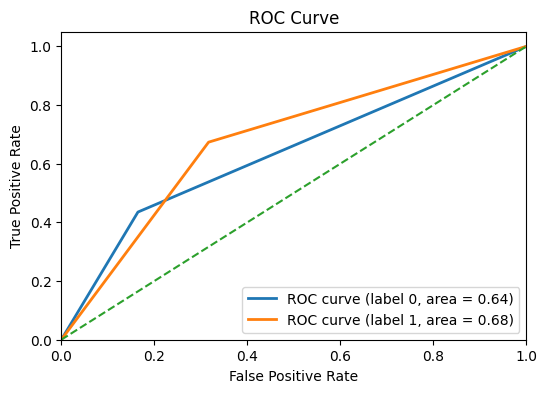

In [39]:
plot_roc_curve(lp_model, X_test, y_test)

* Both AUC scores collaborate our earlier observations about poor prediction capabilities

In [40]:
lp_tuned_model = DecisionTreeClassifier(criterion='entropy', class_weight='balanced', max_depth=10, random_state=42)

lp_tuned_model.fit(X_train, y_train)
y_pred_tuned = lp_tuned_model.predict(X_test)

y_test_np = y_test.values
y_pred_tuned_np = y_pred_tuned

for i in range(y_test_np.shape[1]):
    print(f'Classification Report for Output {i}:')
    print(classification_report(y_test_np[:, i], y_pred_tuned_np[:, i], zero_division=0))
    print('\n.......\n')

Classification Report for Output 0:
              precision    recall  f1-score   support

           0       0.90      0.78      0.84      5040
           1       0.46      0.67      0.55      1390

    accuracy                           0.76      6430
   macro avg       0.68      0.73      0.69      6430
weighted avg       0.80      0.76      0.77      6430


.......

Classification Report for Output 1:
              precision    recall  f1-score   support

           0       0.80      0.66      0.72      3441
           1       0.67      0.81      0.73      2989

    accuracy                           0.73      6430
   macro avg       0.74      0.73      0.73      6430
weighted avg       0.74      0.73      0.73      6430


.......



* The accuracy has improved in predicting both vaccines,
* The h1n1 model is still biased towards class 0 as it is better at predicting individuals who did not take the vaccine.



In [41]:
lp_importances = lp_tuned_model.feature_importances_
lp_feature_names = X_train.columns
lp_feature_importance = pd.Series(lp_importances, index=lp_feature_names)
print("\n--- Label Powerset Classifier - Feature Importance ---")
print(lp_feature_importance.sort_values(ascending=False))


--- Label Powerset Classifier - Feature Importance ---
doctor_recc_h1n1                            0.218186
opinion_seas_risk                           0.163892
opinion_seas_vacc_effective                 0.077358
opinion_h1n1_vacc_effective                 0.076199
doctor_recc_seasonal                        0.062194
opinion_h1n1_risk                           0.038043
health_worker                               0.035468
age_group_65+ Years                         0.026149
opinion_seas_sick_from_vacc                 0.018620
age_group_18 - 34 Years                     0.018320
household_children                          0.017696
h1n1_concern                                0.015515
household_adults                            0.014255
h1n1_knowledge                              0.012916
opinion_h1n1_sick_from_vacc                 0.011790
education_Some College                      0.010965
health_insurance                            0.009004
education_< 12 Years                       

In [42]:
threshold = 0.006

selected_features = lp_feature_importance[lp_feature_importance > threshold].index

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


lp_selected_model = DecisionTreeClassifier(criterion='log_loss', max_depth=5, random_state=42)

lp_selected_model.fit(X_train_selected, y_train)
y_pred_selected = lp_selected_model.predict(X_test_selected)

y_test_np = y_test.values
y_pred_selected_np = y_pred_selected

for i in range(y_test_np.shape[1]):
    print(f'Classification Report for Output {i}:')
    print(classification_report(y_test_np[:, i], y_pred_selected_np[:, i], zero_division=0))
    print('\n.......\n')

Classification Report for Output 0:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      5040
           1       0.63      0.44      0.52      1390

    accuracy                           0.82      6430
   macro avg       0.74      0.69      0.71      6430
weighted avg       0.81      0.82      0.81      6430


.......

Classification Report for Output 1:
              precision    recall  f1-score   support

           0       0.76      0.81      0.79      3441
           1       0.77      0.71      0.74      2989

    accuracy                           0.76      6430
   macro avg       0.76      0.76      0.76      6430
weighted avg       0.76      0.76      0.76      6430


.......



* The h1n1 model has improved significantly but the class 1 f1 score is low meaning it is struggling to balance the output of false positives and false negatives.
* The seasonal model is performing quite well as the metrics are almost balanced meaning it is making relatively even predictions for both classes

In [43]:
param_grid = {
    #'class_weight': ['balanced'],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [5, 8, 10],
}

dtc_model= DecisionTreeClassifier()

grid_search = GridSearchCV(dtc_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train['h1n1_vaccine'])

optimal_params_h1n1 = grid_search.best_params_
print(optimal_params_h1n1)
best_score_h1n1 = grid_search.best_score_
print(best_score_h1n1)

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.8280056162213286


In [44]:
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [5, 8, 10],
}

dtc_model= DecisionTreeClassifier()

grid_search = GridSearchCV(dtc_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train['seasonal_vaccine'])

optimal_params_seasonal = grid_search.best_params_
print(optimal_params_seasonal)
best_score_seasonal = grid_search.best_score_
print(best_score_seasonal)

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.7544945068247333


In [45]:
# include class weight to tackle class imbalance
optimal_h1n1_model = DecisionTreeClassifier(criterion='log_loss', max_depth=5, min_samples_leaf=1, class_weight={0:1, 1:2})

optimal_h1n1_model.fit(X_train, y_train['h1n1_vaccine'])
y_pred_h1n1_op = optimal_h1n1_model.predict(X_test)


print(classification_report(y_test['h1n1_vaccine'], y_pred_h1n1, zero_division=0))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5040
           1       0.70      0.44      0.54      1390

    accuracy                           0.84      6430
   macro avg       0.78      0.70      0.72      6430
weighted avg       0.83      0.84      0.83      6430



In [46]:
# try oversampling class 1
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train['h1n1_vaccine'])
optimal_h1n1_model_im = DecisionTreeClassifier( max_depth=5, min_samples_leaf=1, random_state=42)

optimal_h1n1_model_im.fit(X_train_smote, y_train_smote)
y_pred_h1n1_im = optimal_h1n1_model_im.predict(X_test)


print(classification_report(y_test['h1n1_vaccine'], y_pred_h1n1_im, zero_division=0))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      5040
           1       0.56      0.58      0.57      1390

    accuracy                           0.81      6430
   macro avg       0.72      0.73      0.73      6430
weighted avg       0.81      0.81      0.81      6430



* The oversampling model has improved balance between precision and recall for both classes even though overall accuracy has dropped

In [47]:
optimal_seasonal_model = DecisionTreeClassifier(max_depth=8, min_samples_split=5)

optimal_seasonal_model.fit(X_train, y_train['seasonal_vaccine'])
y_pred_seasonal_op = optimal_seasonal_model.predict(X_test)

print(classification_report(y_test['seasonal_vaccine'], y_pred_seasonal_op, zero_division=0))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      3441
           1       0.77      0.72      0.74      2989

    accuracy                           0.77      6430
   macro avg       0.77      0.76      0.76      6430
weighted avg       0.77      0.77      0.77      6430



* The optimal seasonal model metrics are well balance

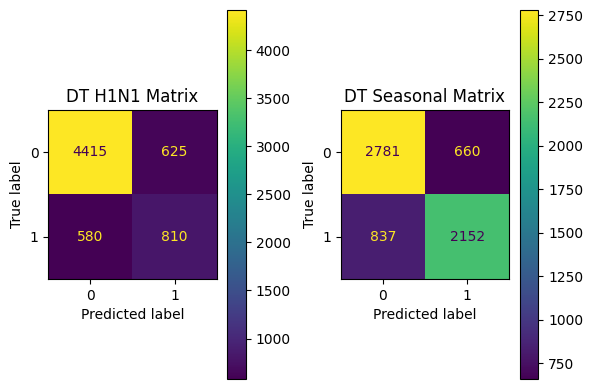

In [48]:
# confusion matrix for optimal h1n1 model
cm_optimal_h1n1_dt = confusion_matrix(y_test['h1n1_vaccine'], y_pred_h1n1_im)

# confusion matrix  for optimal Seasonal vaccine model
cm_optimal_seasonal_dt = confusion_matrix(y_test['seasonal_vaccine'], y_pred_seasonal_op)
fig, axes = plt.subplots(1, 2, figsize=(6, 4))

# Plot h1n1 and seasonal vaccine confusion matrix
display_1 = ConfusionMatrixDisplay(confusion_matrix=cm_optimal_h1n1_dt)
display_2 = ConfusionMatrixDisplay(confusion_matrix=cm_optimal_seasonal_dt)

display_1.plot(ax=axes[0])
axes[0].set_title('DT H1N1 Matrix')

display_2.plot(ax=axes[1])
axes[1].set_title('DT Seasonal Matrix')

plt.tight_layout()
plt.show()

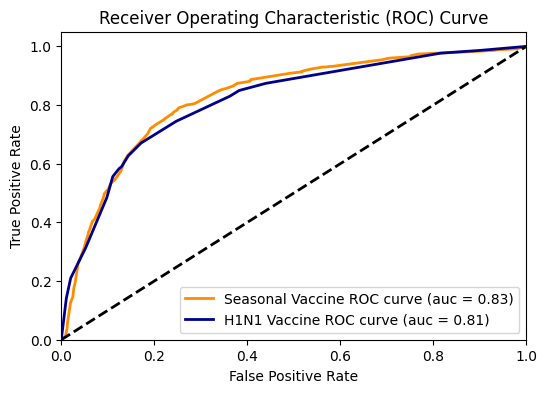

In [49]:
y_pred_proba_h1n1_dt = optimal_h1n1_model_im.predict_proba(X_test)[:, 1]
y_pred_proba_seasonal_dt = optimal_seasonal_model.predict_proba(X_test)[:, 1]

fpr_seasonal, tpr_seasonal, thresholds_seasonal = roc_curve(y_test['seasonal_vaccine'], y_pred_proba_seasonal_dt)
roc_auc_seasonal = auc(fpr_seasonal, tpr_seasonal)

fpr_h1n1, tpr_h1n1, thresholds_h1n1 = roc_curve(y_test['h1n1_vaccine'], y_pred_proba_h1n1_dt)
roc_auc_h1n1 = auc(fpr_h1n1, tpr_h1n1)

plt.figure(figsize=(6, 4))
plt.plot(fpr_seasonal, tpr_seasonal, color='darkorange', lw=2, label=f'Seasonal Vaccine ROC curve (auc = {roc_auc_seasonal:.2f})')
plt.plot(fpr_h1n1, tpr_h1n1, color='darkblue', lw=2, label=f'H1N1 Vaccine ROC curve (auc = {roc_auc_h1n1:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [50]:
# creating a dataframe of feature importances
feature_names = X_train.columns.tolist()
importances_h1n1_dt = optimal_h1n1_model.feature_importances_

h1n1_df_dt = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_h1n1_dt
})
h1n1_df_dt = h1n1_df_dt.sort_values(by='Importance', ascending=False).reset_index(drop=True)

h1n1_df_dt.head(10)

,Feature,Importance
0,doctor_recc_h1n1,0.505109
1,opinion_h1n1_risk,0.206439
2,opinion_h1n1_vacc_effective,0.177667
3,health_worker,0.053660
4,opinion_seas_risk,0.021259
5,h1n1_concern,0.009591
6,doctor_recc_seasonal,0.005210
7,behavioral_avoidance,0.004634
8,sex_Female,0.004063
9,age_group_18 - 34 Years,0.003508


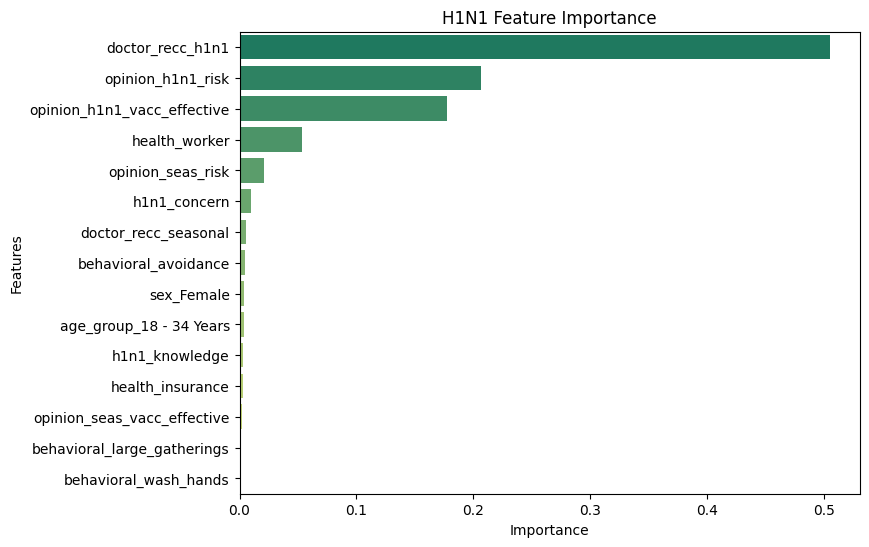

In [51]:
# plot for h1n1 feature importance
fig, ax = plt.subplots(figsize=(8, 6)) 


sns.barplot(x=h1n1_df_dt['Importance'][:15], y=h1n1_df_dt['Feature'][:15], hue=h1n1_df_dt['Feature'][:15], palette='summer', ax=ax)

ax.set_title('H1N1 Feature Importance')
ax.set_ylabel('Features')

plt.show()

In [52]:
feature_names = X_train.columns.tolist()
importances_seasonal_dt = optimal_seasonal_model.feature_importances_

seasonal_df_dt = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_seasonal_dt
})
seasonal_df_dt = seasonal_df_dt.sort_values(by='Importance', ascending=False).reset_index(drop=True)

seasonal_df_dt.head()

,Feature,Importance
0,opinion_seas_risk,0.371984
1,doctor_recc_seasonal,0.188711
2,opinion_seas_vacc_effective,0.156332
3,age_group_65+ Years,0.057222
4,age_group_18 - 34 Years,0.031415


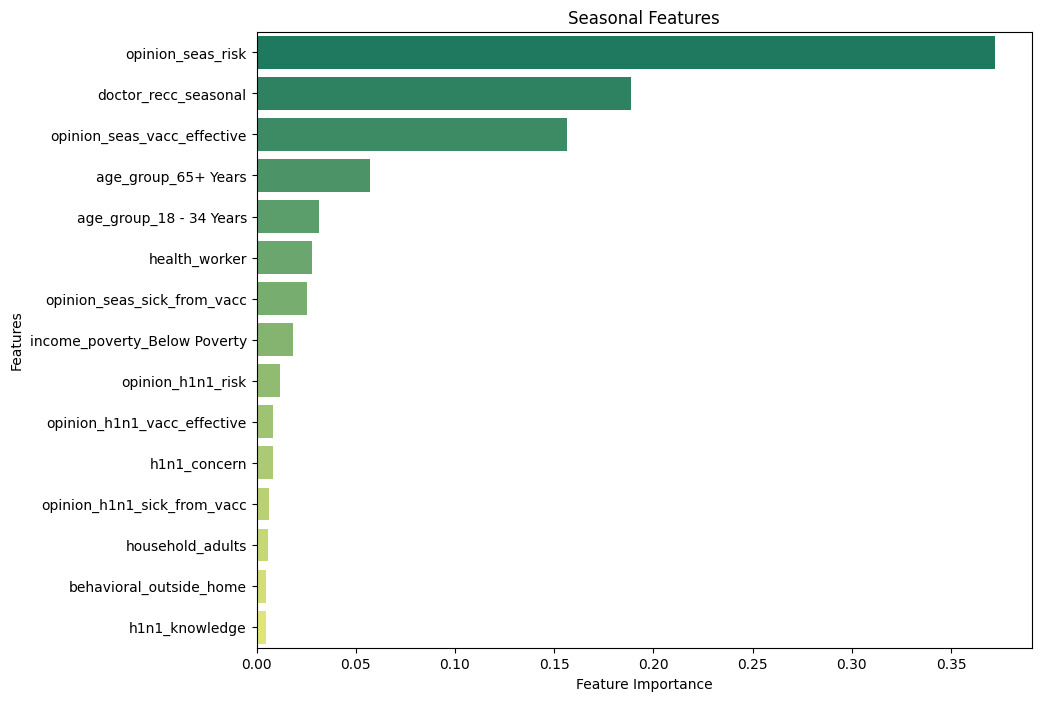

In [53]:
# plot feature importance using dt optimal model
fig, ax = plt.subplots(figsize=(10, 8)) 


sns.barplot(x=seasonal_df_dt['Importance'][:15], y=seasonal_df_dt['Feature'] [:15], hue=seasonal_df_dt['Feature'][:15], palette='summer', ax=ax)

ax.set_title('Seasonal Features')
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Features');

### **CONCLUSION**

Analysis of this data, particularly through feature importance analysis, revealed key drivers for vaccine uptake. For the H1N1 vaccine, doctor recommendation, belief in the vaccine's effectiveness and perceived risk of contracting the H1N1 flu. Interestingly, perceptions about the seasonal flu and contact with young children also showed some influence.

For the seasonal flu vaccine, Individuals' perceived risk of getting sick, whether their doctor recommended the vaccine, and their belief in its effectiveness. Older age and being a healthcare worker also played significant roles.

Across both vaccines, health-related factors and individual opinions were far more influential in the decision to get vaccinated than demographic, socioeconomic factors and general preventative behaviors.